# Analyzing Marketing Campaign

#### In today's fast-paced business world, it's essential to assess the impact of marketing campaigns to make informed, data-backed decisions. This notebook delves into the details of a recent marketing campaign, offering valuable insights for marketers, business analysts, and stakeholders alike.

#### The dataset includes a range of factors such as customer information, campaign specifics, and how customers responded. By analyzing this data, our goal is to identify trends in customer engagement, highlight effective strategies, and pinpoint areas where improvement is needed. This analysis will not only provide a clearer picture of customer behavior but also help shape future marketing efforts for even better outcomes.

# 1. Dataset Selection

In [33]:
# importing Assets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [34]:
filePath = r"D:\VS Python\train.csv\train.csv"
df = pd.read_csv(filePath)

# Reading Dataset

In [35]:
df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


# **Dataset:** A marketing campaign dataset with **31,480 rows** and **20 columns**.  
**Context:** Contains information about customer demographics, financial status, and interaction details with a marketing campaign.  

### Key Columns:
- **target**: Whether the customer responded ("yes"/"no").
- **day, month**: Date of contact.
- **duration**: Length of the contact.
- **age, gender, job, maritalStatus, education**: Customer details.
- **accountBalance, creditFailure, house**: Financial information.
- **contactType, numberOfContacts**: Contact details.

In [24]:
df.describe()

,id,day,duration,contactId,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
count,3.148000e+04,31480.000000,31480.000000,3.148000e+04,31480.000000,31480.000000,31480.000000,5738.000000,31480.000000
mean,4.321650e+08,15.799015,258.498380,3.464717e+07,40.935737,1348.535133,2.779670,225.272395,0.584339
std,1.304725e+04,8.323251,256.576891,2.011538e+07,10.629198,2974.355578,3.139269,116.488328,2.469742
min,4.321423e+08,1.000000,0.000000,6.230000e+02,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,4.321536e+08,8.000000,104.000000,1.709904e+07,33.000000,70.000000,1.000000,133.000000,0.000000
50%,4.321650e+08,16.000000,180.000000,3.468141e+07,39.000000,442.000000,2.000000,195.000000,0.000000
75%,4.321762e+08,21.000000,320.000000,5.204811e+07,48.000000,1410.000000,3.000000,327.000000,0.000000
max,4.321876e+08,31.000000,4918.000000,6.954660e+07,95.000000,98417.000000,63.000000,871.000000,275.000000


In [25]:
df.describe(include='object')

,target,month,gender,job,maritalStatus,education,creditFailure,house,credit,contactType,lastCampaignResult
count,31480,31480,31480,31480,31480,31480,31480,31480,31480,31480,31480
unique,2,12,2,12,3,4,2,2,2,3,4
top,no,may,male,worker,married,highSchool,no,yes,no,cellPhone,unknown
freq,27780,9514,15770,6781,19002,16188,30925,17503,26477,20353,25746


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

### -> checking missing values

In [27]:
print((df.isna().sum()/len(df)) * 100)

id                               0.000000
target                           0.000000
day                              0.000000
month                            0.000000
duration                         0.000000
contactId                        0.000000
age                              0.000000
gender                           0.000000
job                              0.000000
maritalStatus                    0.000000
education                        0.000000
creditFailure                    0.000000
accountBalance                   0.000000
house                            0.000000
credit                           0.000000
contactType                      0.000000
numberOfContacts                 0.000000
daySinceLastCampaign            81.772554
numberOfContactsLastCampaign     0.000000
lastCampaignResult               0.000000
dtype: float64


### -> Handling Missing Values

In [28]:
df.drop('daySinceLastCampaign', axis=1, inplace=True)

# 2. Basic Plots


## (i) Line Plot
### **Trend of Contacts Over Days**  
Shows how the number of contacts fluctuates across different days.  

**Insight:** The number of contacts varies daily, indicating possible strategic outreach on certain days.  

🔹 **Plot:**  


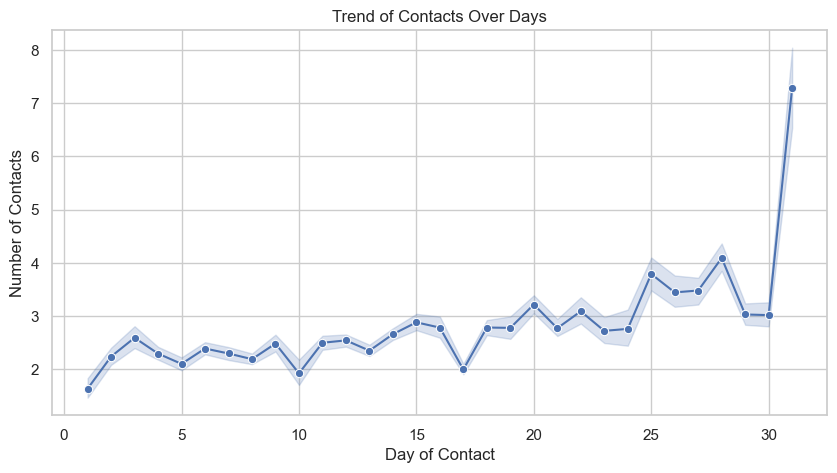

In [29]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10,5))
sns.lineplot(x=df["day"], y=df["numberOfContacts"], marker="o", color="b")
plt.title("Trend of Contacts Over Days")
plt.xlabel("Day of Contact")
plt.ylabel("Number of Contacts")
plt.show()

######       (Displayed above: Number of Contacts vs. Day of Contact)

## (ii) Bar Chart
### **Total Contact Duration by Month**  
Compares total contact duration across different months.  

**Insight:** Some months have higher engagement, suggesting seasonal trends.

🔹 **Plot:**  


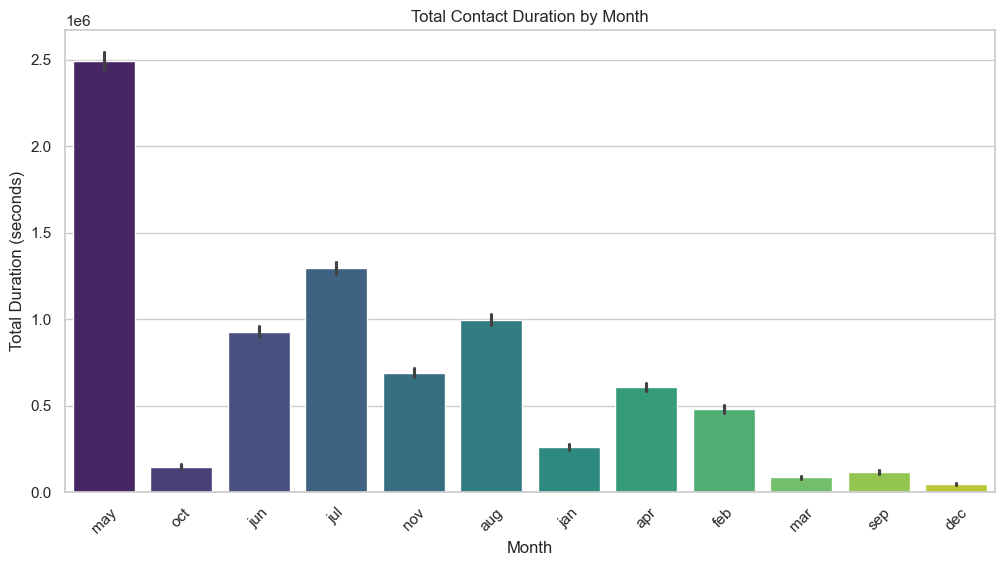

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["month"], y=df["duration"], estimator=sum, hue= df["month"], palette="viridis", legend=False)
plt.title("Total Contact Duration by Month")
plt.xlabel("Month")
plt.ylabel("Total Duration (seconds)")
plt.xticks(rotation=45)
plt.show()

###### (Displayed above: Total Duration vs. Month)

## (iii) Scatter Plot 
### Age vs. Account Balance
Analyzes how account balance varies with age.  

**Insight:** No strong correlation, but some outliers have very high balances.

🔹 **Plot:**  

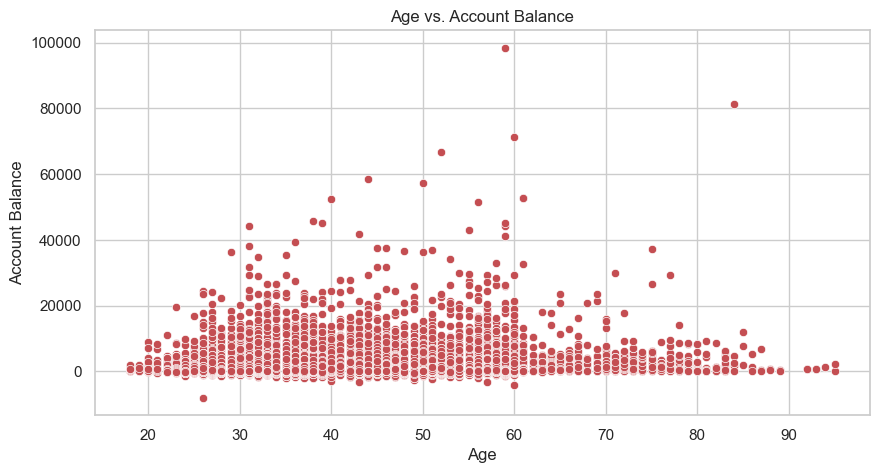

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["age"], y=df["accountBalance"], alpha=1, color="r")
plt.title("Age vs. Account Balance")
plt.xlabel("Age")
plt.ylabel("Account Balance")
plt.show()

###### (Displayed above: Age vs. Account Balance)

## (iv) Box Plot  
### **Distribution of Contact Duration**  
Visualizes the spread and outliers in contact duration.  

📊 **Insight:** Most contacts are short, but some last significantly longer.  

🔹 **Plot:**  

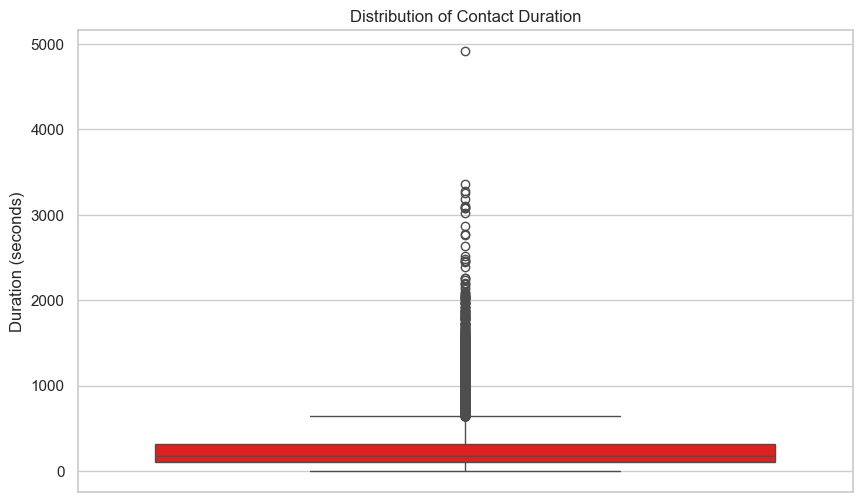

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["duration"], color="red")
plt.title("Distribution of Contact Duration")
plt.ylabel("Duration (seconds)")
plt.show()

###### (Displayed above: Contact Duration Boxplot)

## 3. Customizing Plots 
### ✔️ Titles, labels, and legends have been added.
### ✔️ Colors and markers are adjusted for readability.

## 4. Insights and Observations
### ✔️ Each visualization has a brief note explaining key takeaways.